# Decision Trees

This Jupyter Notebook is dedicated to understanding and implementing decision trees for soccer data. You can find the dataset [2022-2023 Soccer Player Stats Dataset](https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats?resource=download).

The following packages are required to run the attached code:

- [Matplotlib.pylab](https://matplotlib.org/2.0.2/api/pyplot_api.html)

- [Numpy](https://numpy.org/doc/)

- [Seaborn](https://seaborn.pydata.org/)

- [Pandas](https://pandas.pydata.org/docs/)

- [SciKit Learn](https://scikit-learn.org/stable/)

- [MlxTend](https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/)

## Description of the Algorithm:

***
Continuing our study of non-parametric supervised learning methods, we will now study decision trees, which are used for classification and regression.

The idea behind decision trees is to predict the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation, splitting up the data by these inferred decisions.

Decision trees are great for predictive modeling because they are both understandable and effective. Decision trees split populations into segments and use those segments to help make predictions.

There are two stages to prediction using decision trees. The first stage is  to train the model: building, testing, and optimizing the tree. In the second stage, you test the tree on new data.
***

## Make Up of a Decision Tree:

***
Decision trees are constructed from only two elements: nodes and branches.

- Nodes: These are the split points in the data that breaks the data into subsets
  - Root Node: The node at the top of a decision tree. This node acts as the input node for the predictors in the model.
  - Leaf Nodes: The final nodes in the tree and the spot at which the prediction is made.

- Branches: The branches connect the nodes in the tree and represent outcome of the splits at each node.

Here is an example of one decision tree:

![image.png](https://images.spiceworks.com/wp-content/uploads/2022/05/12043057/Buying-a-Car.png)

This example might seem arbitrary, but decision trees are an incredibly powerful tool for classification and regression.

Image from [SpiceWorks](https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-decision-tree/).

***

## Setting Up:

***
Import the data and necessary modules.
***

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

***
Import and process the data.
***

In [56]:
#Import the dataset.
soccer = pd.read_csv("soccer_stats.csv", encoding='ISO-8859-1', delimiter=';')

# Filter the data such that we are only including players who have player more than 7.5 games worth of time.
soccer = soccer[soccer['90s'] >= 7.5]

# Filter to only include forwards and defenders.
data = soccer[(soccer['Pos'] == 'FW') | (soccer['Pos'] == 'DF')]

# Get the forwards and defenders.
forward = data[data['Pos'] == 'FW']
defender = data[data['Pos'] == 'DF']

# Get the goals for forwards and defenders to use as a predictor.
fw_goals = forward['Goals'].values
df_goals = defender['Goals'].values

# Select clearances as a predictor.
fw_clr = forward['Clr'].values
df_clr = defender['Clr'].values

# Get the data for our model.
predictors = data[['Goals', 'Clr']].values
response = [[int(val)] for val in (data['Pos'] == 'FW')]
response = np.ravel(response)

# Split the data into training and testing sets.
train_p, test_p, train_r, test_r = train_test_split(predictors, response, test_size = 0.4, random_state = 42)

***
Although we've used this data before, let's still plot it to see the training data.
***

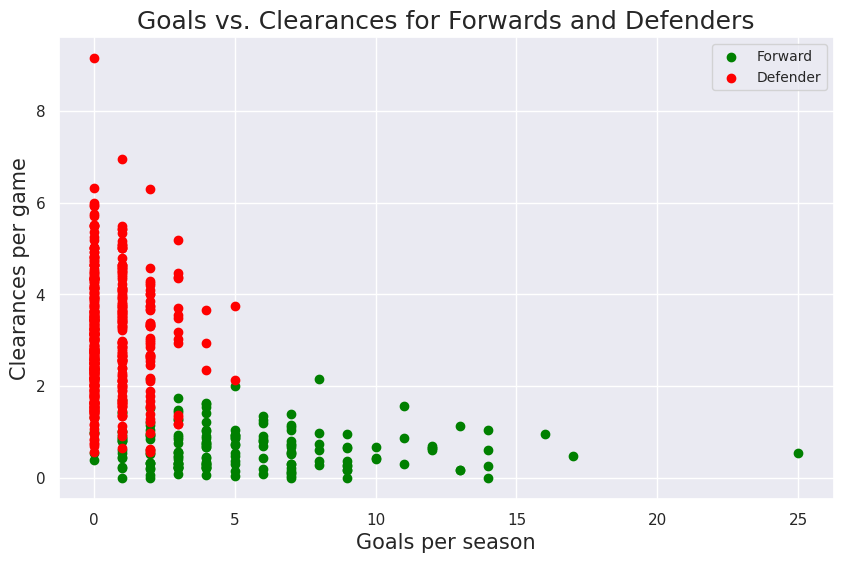

In [57]:
# Set the theme.
sns.set_theme()

# Set the figure size.
plt.figure(figsize = (10, 6))

# Add the forwards to the plot.
plt.scatter(fw_goals, fw_clr, color = "green", label = "Forward")

# Add the non red card players to the plot.
plt.scatter(df_goals, df_clr, color = "red", label = "Defender")
plt.xlabel("Goals per season", fontsize = 15)
plt.ylabel("Clearances per game", fontsize = 15)
plt.legend(fontsize = 10, loc = "upper right")
plt.title("Goals vs. Clearances for Forwards and Defenders", fontsize = 18)
plt.show()

***
We can use SciKit Learn to do decision tree classification:
***

In [58]:
# Create the decision tree classifier.
decision_tree = DecisionTreeClassifier(max_depth = 5, random_state=42)
decision_tree.fit(train_p, train_r)

DecisionTreeClassifier(max_depth=5, random_state=42)

***
Let's visualize the tree structure:
***

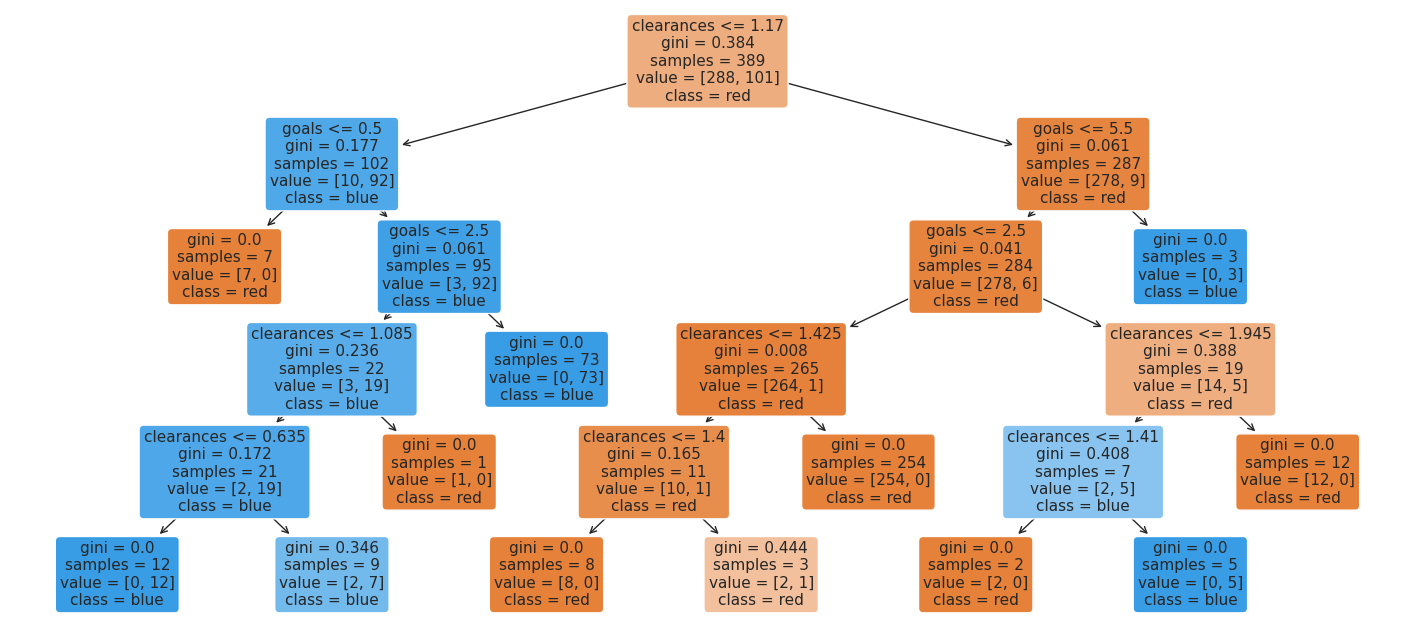

In [59]:
# Get the tree for our predictors.
tree_rules = export_text(decision_tree, feature_names = ["x_0", "x_1"])

# Set the size of the plot.
plt.figure(figsize=(18, 8))

# Plot the data.
dt_plot = plot_tree(decision_tree, feature_names = ["goals", "clearances"], class_names = ["red", "blue"],
rounded = True, filled = True, fontsize = 11)

As you can see, each node acts as a divide that splits the data into subsets! You can follow these splits on the predictors as they go down the tree.

## Reading a tree:

***
1. Begin at the at the root node (depth = 0, start at the top!).

2. If $x_1 \leq 34.55$, move down to the root's left "child" node (depth 1, to the left now!).

3. Otherwise, if $x_1 \geq 34.55$ move down to the root's right "child" node (depth 1, right this time!).

4. Repeat the process in steps 2 & 3 of moving to successive child nodes according to satifying the condition at each "parent" node until you reach a leaf node -- a node at the end of the graph.

5. Our classification of this leaf node will be the predicted class of the imputed data point!

Doing this for many data points allows us to classify an entire data set.
***

***
Now, let's visualize our predictions!
***

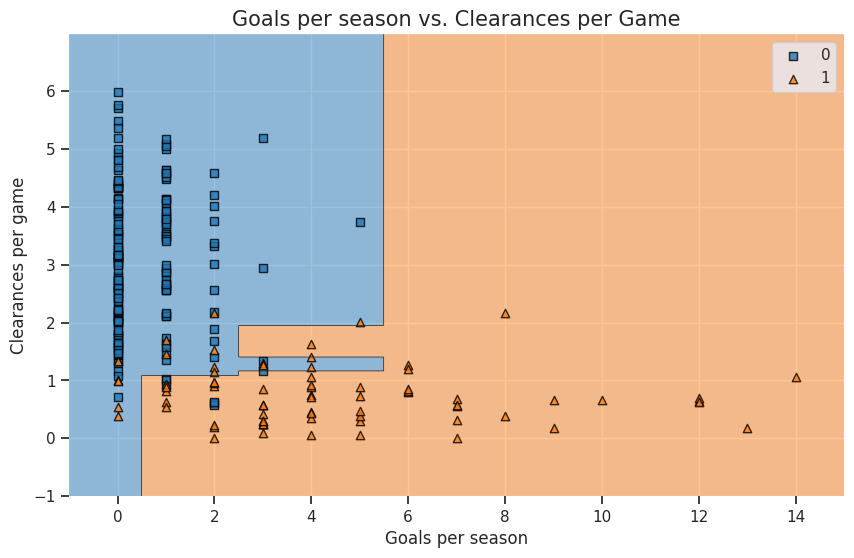

In [60]:
# Set the figure size.
plt.figure(figsize = (10, 6))

# Plot the data.
plot_decision_regions(test_p, test_r, clf = decision_tree)
plt.xlabel("Goals per season", fontsize = 12)
plt.ylabel("Clearances per game", fontsize = 12)
plt.title("Goals per season vs. Clearances per Game", fontsize = 15)
plt.legend()
plt.show()

This, again is not perfect given the data set we are using. But, it seems to do a pretty good job of making predictions except for a few weird areas.

***
Let's evaluate our predictions.
***

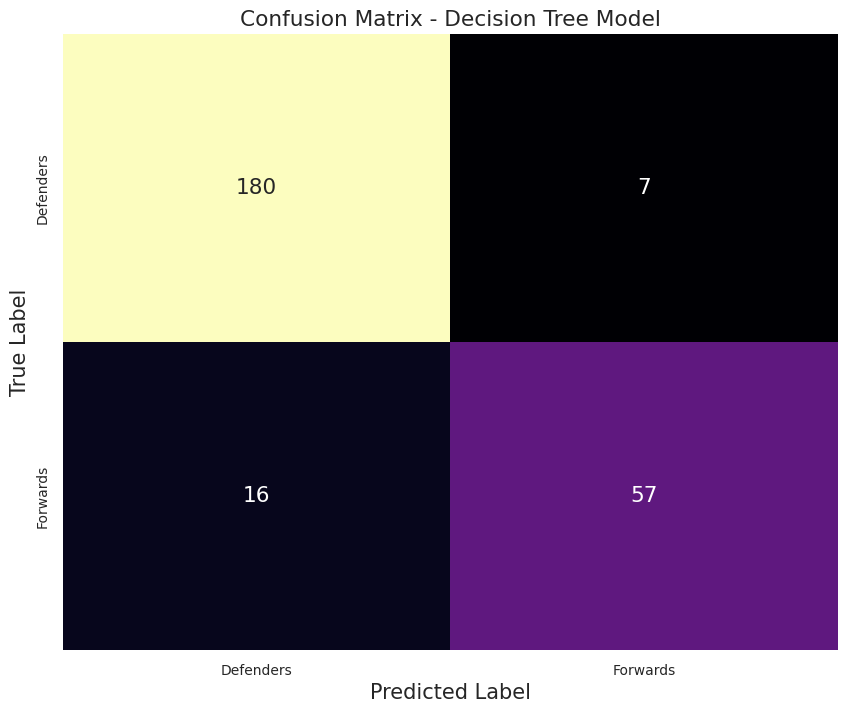

In [61]:
# Make predictions for test data.
test_pred_decision_tree = decision_tree.predict(test_p)

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(test_r, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)

# Set the figure size.
plt.figure(figsize=(10, 8))

# Set the axes.
ax = plt.axes()
sns.set(font_scale=1.3)

# Get a heatmap.
sns.heatmap(matrix_df, annot = True,  fmt = "g", ax = ax, cmap = "magma", cbar = False)

# Plot the data.
ax.set_title("Confusion Matrix - Decision Tree Model")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["Defenders", "Forwards"],rotation = 0, fontsize = 10)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["Defenders", "Forwards"], rotation= 90, fontsize = 10)
plt.show()

***
We can also get a nice classification report.
***

In [62]:
# Get the y predictions.
y_pred = decision_tree.predict(test_p)

#Checking performance our model with classification report.
print(classification_report(test_r, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       187
           1       0.89      0.78      0.83        73

    accuracy                           0.91       260
   macro avg       0.90      0.87      0.89       260
weighted avg       0.91      0.91      0.91       260



Interestingly, we seem to do better with one class over another. This may be because class 0 is larger.

## A Note on Max Depth:

***
The max depth of a decision tree determines the maximum number of branches from the root node we can go.

This is very similar to the balance we say with picking the right "k" value for k-nearest neighbors because choosing a depth that is too shallow will leave us too general, while we will be overfit for a max depth that is too large.

In class, we started with a depth of 15 before adjusting to something better -- I believe around 5.

Let's see what worked best for this data set.

***

***
Compute the decision tree at different depths and compare the accuracies.
***

In [63]:
# Define a function to get the errors.
def error(test_r_hat, test_r, train_p, train_r):
  err = 0
  for i in range(len(test_p)-1):
      err += (test_r_hat[i] != test_r[i])
  return err/len(test_p)

# Get the errors for our range of possible max depth values.
possible_md = [md for md in range(1, 17, 2)]
errors = []

# Iterate through the possible mds.
for md in possible_md:
  decision_tree = DecisionTreeClassifier(max_depth = md, random_state=42)
  decision_tree.fit(train_p, train_r)
  test_r_hat = decision_tree.predict(test_p)
  errors.append(error(test_r_hat, test_r, train_p, train_r))

print(errors)

[0.09230769230769231, 0.08461538461538462, 0.08461538461538462, 0.08461538461538462, 0.09230769230769231, 0.09230769230769231, 0.09230769230769231, 0.09230769230769231]


***
Let's plot our results.
***

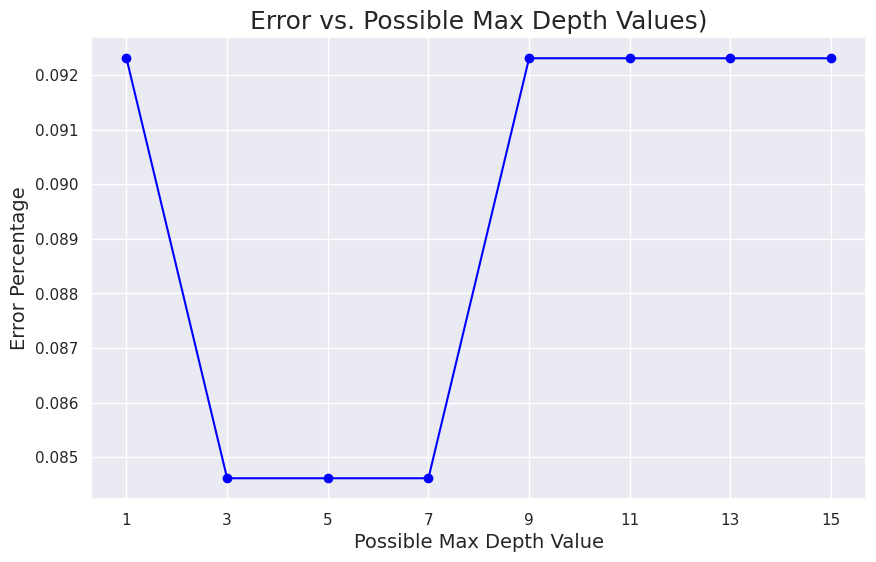

In [64]:
# Set the theme.
sns.set_theme()

# Set the figure size.
plt.figure(figsize = (10, 6))

# Plot the data.
plt.plot(possible_md, errors, color = 'blue', marker = "o")
plt.xlabel('Possible Max Depth Value', fontsize = 14)
plt.ylabel('Error Percentage', fontsize = 14)
plt.xticks(possible_md)
plt.title("Error vs. Possible Max Depth Values)", fontsize = 18)
plt.show()

As you can see, we do the best for lower numbers of max depth, especially for 3 - 7. Again, this may change from dataset to dataset, so it's good to check what does the best!

## Regression Trees:

***
Decision trees are flexible and allow us to implement regression and classification. Let's implement regression now!
***

***
Import the necessary data.
***

In [65]:
# Filter the data such that we are only including players who have player more than 15 games worth of time.
soccer = soccer[soccer['90s'] >= 15.0]

# Just use the first 250 data points.
data = soccer[:250]

# Selects carries into the penalty area as our predictor.
predictors = data[['CPA']]

# Now do the same for the clearances.
y = data[['Clr']]

# Convert each to a numpy array.
y = y.values
x = predictors.values

# Get the testing data.
testing = soccer[250:]
t_predictors = data[['CPA']]
t_y = data[['Clr']]
t_y = t_y.values
t_x = t_predictors.values


***
Initialize the decision tree.
***

In [66]:
# Initialize a decision tree and fit it.
decision_tree = DecisionTreeRegressor(max_depth = 4, random_state = 12)
decision_tree.fit(x, y)

DecisionTreeRegressor(max_depth=4, random_state=12)

***
Let's plot the tree.
***

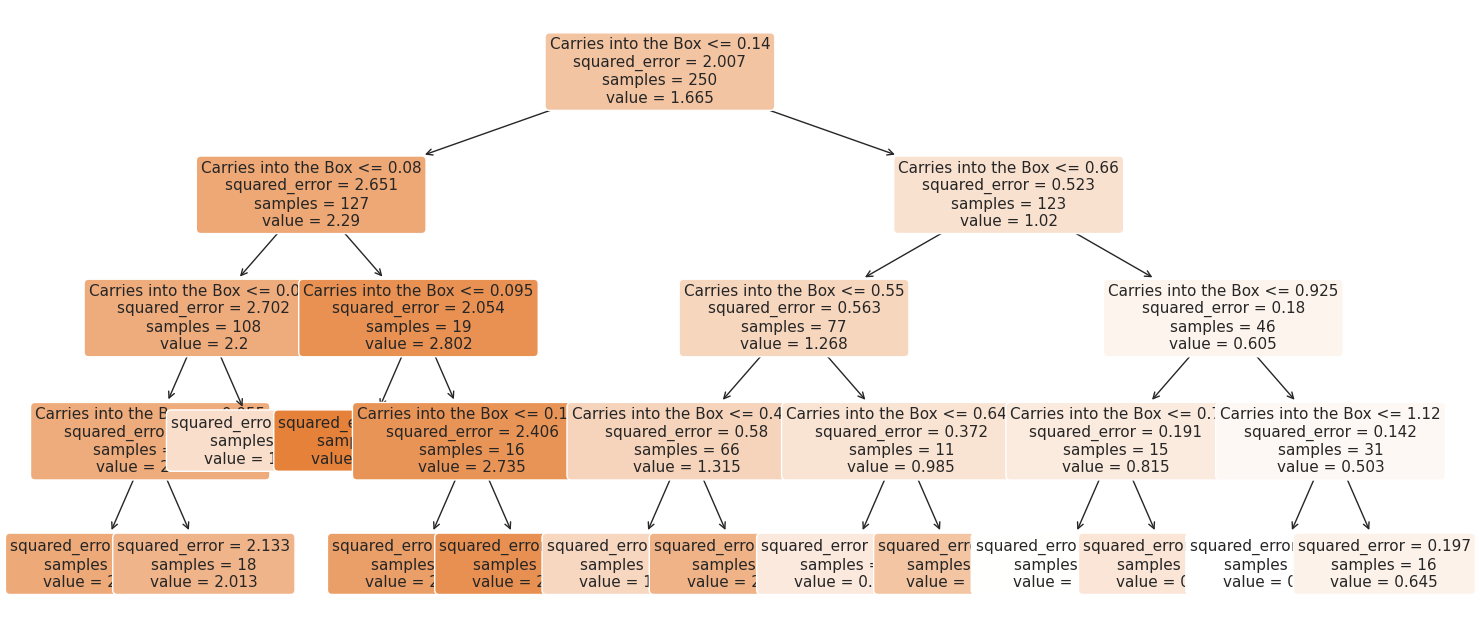

In [67]:
# Get the tree for our predictors.
tree_rules = export_text(decision_tree, feature_names = ["Carries into the Box"])

# Set the size of the plot.
plt.figure(figsize=(18, 8))

# Plot the data.
dt_plot = plot_tree(decision_tree, feature_names = ["Carries into the Box", "Clearances"], class_names = ["red", "blue"],
rounded = True, filled = True, fontsize = 11)

***
Let's test the max depth again.
***

In [68]:
# Define a function to get the errors.
def error(test_r_hat, test_r):
  err = 0
  for i in range(len(t_x)):
      err += (test_r_hat[i] != test_r[i])
  return err/len(test_p)

# Get the errors for our range of possible max depth values.
possible_md = [md for md in range(1, 17, 2)]
errors = []

# Iterate through the possible mds.
for md in possible_md:
  decision_tree = DecisionTreeRegressor(max_depth = md, random_state=42)
  decision_tree.fit(x, y)
  test_r_hat = decision_tree.predict(t_x)
  errors.append(error(test_r_hat, t_y)[0])

print(errors)

[0.9615384615384616, 0.9615384615384616, 0.95, 0.9230769230769231, 0.8538461538461538, 0.8115384615384615, 0.8115384615384615, 0.8076923076923077]


***
Let's plot it to see the results.
***

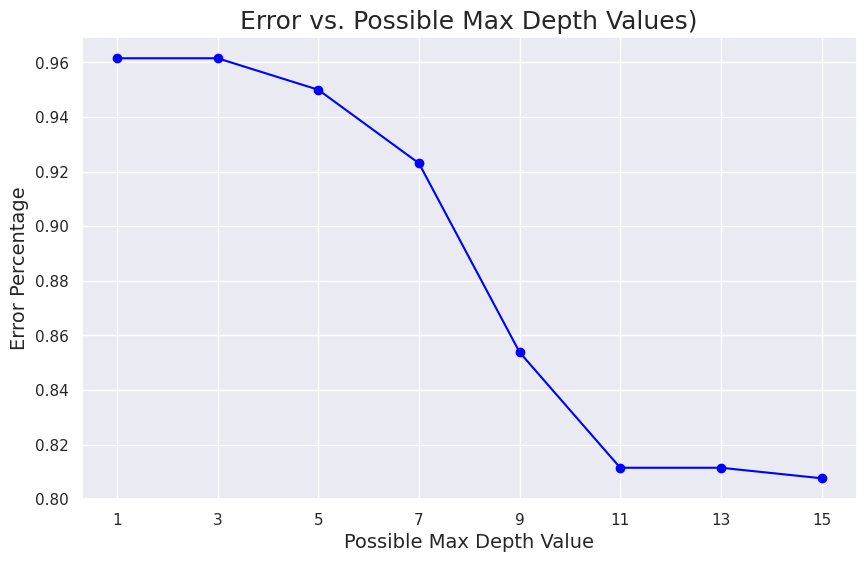

In [69]:
# Set the theme.
sns.set_theme()

# Set the figure size.
plt.figure(figsize = (10, 6))

# Plot the data.
plt.plot(possible_md, errors, color = 'blue', marker = "o")
plt.xlabel('Possible Max Depth Value', fontsize = 14)
plt.ylabel('Error Percentage', fontsize = 14)
plt.xticks(possible_md)
plt.title("Error vs. Possible Max Depth Values)", fontsize = 18)
plt.show()

Now, we see that the error gets lower as we increase the max depth. This just goes to show why it's important to test for the best option for each new dataset.

## Conclusion:

***
- Interpretability: Decision trees offer intuitive and interpretable models that mimic human decision-making processes. The hierarchical structure of decision nodes and branches makes it easy to understand the logic behind predictions, making them suitable for decision support systems and domain experts.
- Nonlinear Relationships: Decision trees can capture nonlinear relationships between input features and the target variable. They partition the feature space into regions based on simple decision rules, allowing for flexible modeling of complex data patterns without assuming linearity.
- Prone to Overfitting: Decision trees are prone to overfitting, especially when the tree depth is too large or when the dataset contains noise or irrelevant features. Regularization techniques such as pruning, limiting tree depth, and setting minimum samples per leaf can mitigate overfitting and improve generalization performance.
***